In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install statsmodels

In [25]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\Air Passengers.csv",parse_dates=True)
df.index.freq='MS'

In [26]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [27]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [29]:
train_data=df.iloc[:108]#0 to 107 rows
test_data=df.iloc[108:]#108 to end rows

In [30]:
train_data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
103,1957-08,467
104,1957-09,404
105,1957-10,347
106,1957-11,305


In [31]:
test_data

,Month,#Passengers
108,1958-01,340
109,1958-02,318
110,1958-03,362
111,1958-04,348
112,1958-05,363
113,1958-06,435
114,1958-07,491
115,1958-08,505
116,1958-09,404
117,1958-10,359


<Axes: >

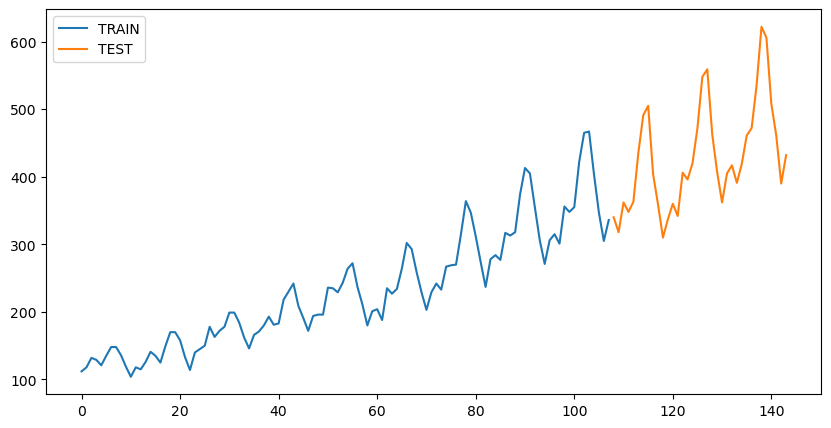

In [32]:
plt.figure(figsize=(10,5))
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label="TEST")

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [38]:
model=ExponentialSmoothing(train_data['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)#training data is passed,12 years data

In [37]:
fitted_model=model.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [39]:
test_prediction=fitted_model.forecast(36)

In [40]:
test_prediction

108    356.968612
109    344.588787
110    405.718307
111    400.610791
112    409.001626
113    480.694172
114    530.470070
115    523.288591
116    454.210633
117    392.518145
118    345.928406
119    396.605137
120    408.958851
121    394.775982
122    464.808633
123    458.957239
124    468.570147
125    550.704262
126    607.729708
127    599.502291
128    520.363562
129    449.685950
130    396.310707
131    454.368187
132    468.521141
133    452.272627
134    532.505094
135    525.801482
136    536.814449
137    630.910882
138    696.241726
139    686.816038
140    596.151250
141    515.179887
142    454.030875
143    520.544063
dtype: float64

In [1]:
143-108

35

<Axes: >

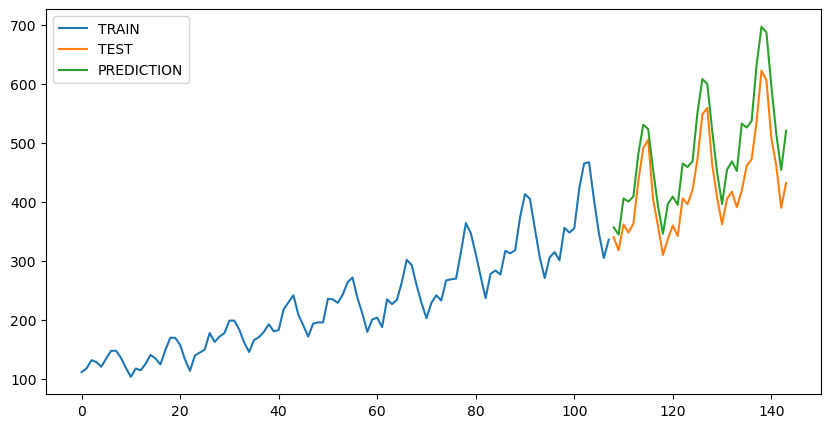

In [41]:
plt.figure(figsize=(10,5))
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label="TEST")
test_prediction.plot(legend=True,label="PREDICTION")

<Axes: >

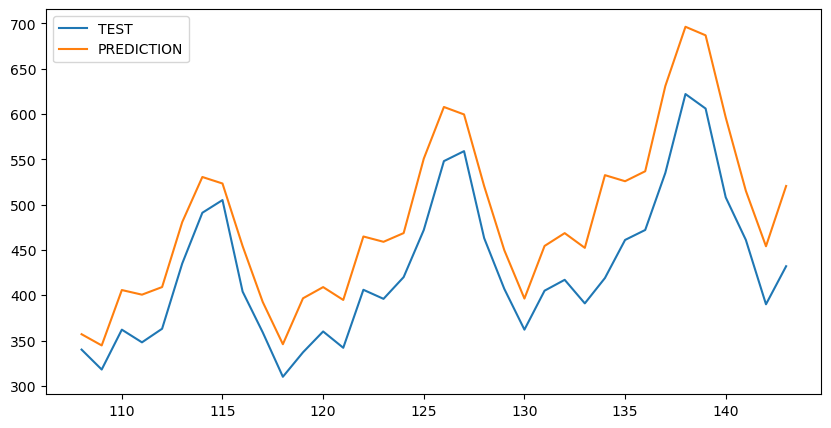

In [59]:
plt.figure(figsize=(10,5))
test_data['#Passengers'].plot(legend=True,label="TEST")
test_prediction.plot(legend=True,label="PREDICTION")


In [48]:
from sklearn.metrics import mean_squared_error

### forecasting onto future

In [55]:
final_model=ExponentialSmoothing(df['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [56]:
forecast_predictions=final_model.forecast(36)

<Axes: >

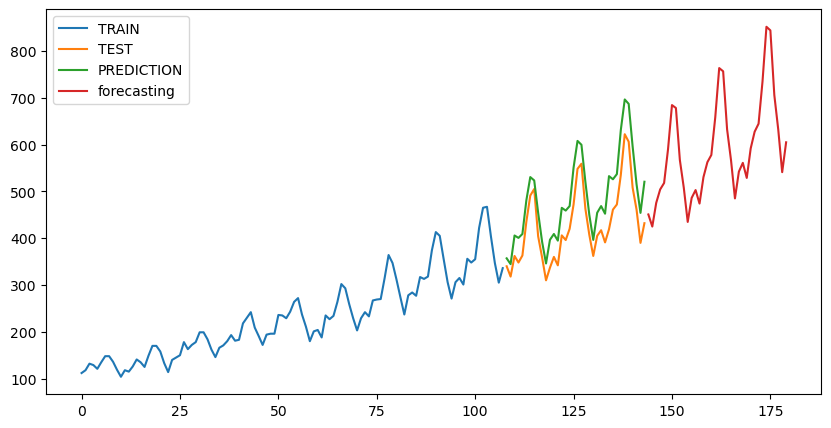

In [58]:
plt.figure(figsize=(10,5))
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label="TEST")
test_prediction.plot(legend=True,label="PREDICTION")
forecast_predictions.plot(label='forecasting',legend=True)
